Começo do Código

Importação de Bibliotecas

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

Carregar o Dataset

In [2]:
df = pd.read_excel('data/Dados_2012-2022.xlsx')

## Mesma DataFrame, mas sem os dados de 2020 e 2021

#
df_sem_2020 = df[df['Ano'] != 2020]
#

df_sem_2020e2021 = df_sem_2020[df_sem_2020['Ano'] != 2021]

model_LR = LinearRegression()

In [3]:
df.head(5)

,Dia Semana,Dia,Mês,Ano,Data,Nº de Chamadas
0,Domingo,1,1,2012,2012-01-01,4538
1,Segunda-feira,2,1,2012,2012-01-02,3263
2,Terça-feira,3,1,2012,2012-01-03,3126
3,Quarta-feira,4,1,2012,2012-01-04,3199
4,Quinta-feira,5,1,2012,2012-01-05,2999


In [4]:
## Iniciação das variaveis dos meses

janeiro_comCOVID = df[((df['Mês'] == 1))]
fevereiro_comCOVID = df[((df['Mês'] == 2))]
marco_comCOVID = df[((df['Mês'] == 3))]
abril_comCOVID = df[((df['Mês'] == 4))]
maio_comCOVID = df[((df['Mês'] == 5))]
junho_comCOVID = df[((df['Mês'] == 6))]
julho_comCOVID = df[((df['Mês'] == 7))]
agosto_comCOVID = df[((df['Mês'] == 8))]
setembro_comCOVID = df[((df['Mês'] == 9))]
outubro_comCOVID = df[((df['Mês'] == 10))]
novembro_comCOVID = df[((df['Mês'] == 11))]
dezembro_comCOVID = df[((df['Mês'] == 12))]

janeiro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 1))]
fevereiro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 2))]
marco_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 3))]
abril_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 4))]
maio_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 5))]
junho_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 6))]
julho_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 7))]
agosto_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 8))]
setembro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 9))]
outubro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 10))]
novembro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 11))]
dezembro_semCOVID = df_sem_2020e2021[((df_sem_2020e2021['Mês'] == 12))]

### Número de Chamadas por ano

In [5]:
# Sem contar com os anos 2020 e 2021
calls_by_year = df_sem_2020e2021.groupby('Ano')['Nº de Chamadas'].sum()
calls_by_year_df = pd.DataFrame(calls_by_year)
calls_by_year_df = calls_by_year_df.reset_index()
calls_by_year_df

,Ano,Nº de Chamadas
0,2012,1150504
1,2013,1199608
2,2014,1260195
3,2015,1304750
4,2016,1372526
5,2017,1365850
6,2018,1393833
7,2019,1415096
8,2022,1527380


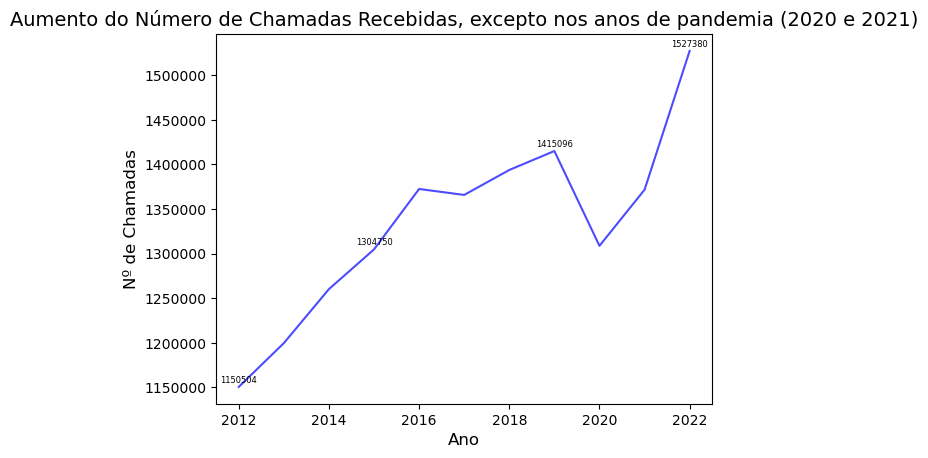

In [6]:
fig, ax = plt.subplots()
calls_by_year = df.groupby('Ano')['Nº de Chamadas'].sum()

data = pd.DataFrame({'Ano': calls_by_year.index, 'Nº de Chamadas': calls_by_year.values})

# ajustar um modelo de regressão linear
model_LR.fit(data[['Ano']], data['Nº de Chamadas'])
ax.plot(data['Ano'], data['Nº de Chamadas'], color='blue', alpha=.7)

ax.set_title('Aumento do Número de Chamadas Recebidas, excepto nos anos de pandemia (2020 e 2021)', fontsize=14)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Nº de Chamadas', fontsize=12)

# remover a notação científica do eixo y
ax.ticklabel_format(style='plain', axis='y')

# adicionar rótulos com os valores de chamadas em anos selecionados
for x, y in zip(data['Ano'], data['Nº de Chamadas']):
    if x in [2012, 2015, 2019, 2022]:
        label = "{:.0f}".format(y)
        ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 3), ha='center', fontsize=6)

fig.savefig('Img/Aumento de Chamadas Recebidas.png')
plt.show()

### Linha de Regressão Linear com o numero total de chamadas por ano (Sem 2020 e 2021)

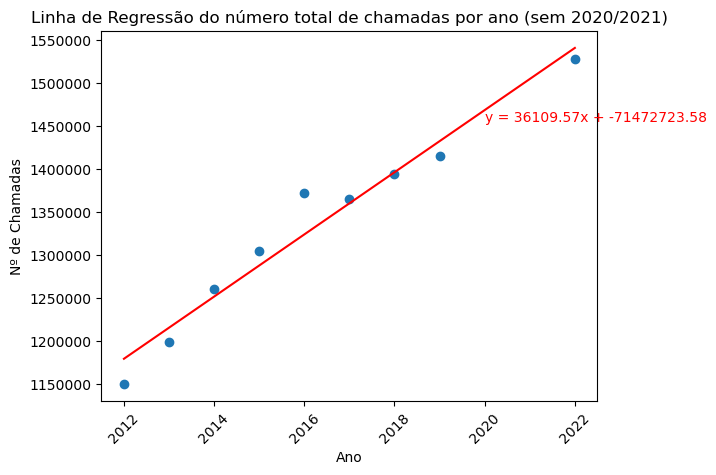

In [7]:
df_grouped = df_sem_2020e2021.groupby('Ano')['Nº de Chamadas'].sum().reset_index()

anos = np.array(df_grouped['Ano']).reshape((-1, 1))
chamadas = np.array(df_grouped['Nº de Chamadas'])

# Treinar o modelo nos dados
model_LR.fit(anos, chamadas)
previsao = model_LR.predict(anos)

# calcular a equação da reta de regressão e adicioná-la no gráfico
slope, intercept, r_value, p_value, std_err = stats.linregress(df_grouped['Ano'], df_grouped['Nº de Chamadas'])
equacao_reta = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equacao_reta, xy=(2020, 1455000), fontsize=10, color='red')

# remover a notação científica do eixo y
plt.ticklabel_format(style='plain', axis='y')

# Desenhar gráfico
plt.scatter(anos, chamadas)
plt.plot(anos, previsao, color='red')
plt.xlabel('Ano')
plt.ylabel('Nº de Chamadas')
plt.title('Linha de Regressão do número total de chamadas por ano (sem 2020/2021)')
plt.xticks(rotation=45)
plt.show()

### Linha de Regressão Linear com o numero total de chamadas por ano

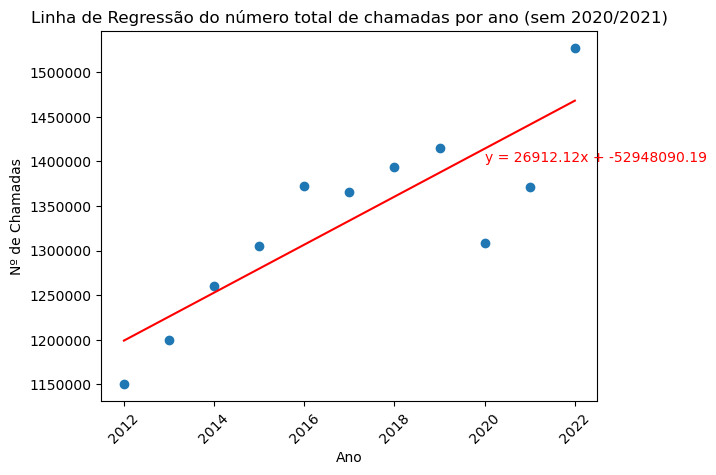

In [8]:
df_grouped = df.groupby('Ano')['Nº de Chamadas'].sum().reset_index()

anos = np.array(df_grouped['Ano']).reshape((-1, 1))
chamadas = np.array(df_grouped['Nº de Chamadas'])

# Treinar o modelo nos dados
model_LR.fit(anos, chamadas)
previsao = model_LR.predict(anos)

# calcular a equação da reta de regressão
slope, intercept, r_value, p_value, std_err = stats.linregress(df_grouped['Ano'], df_grouped['Nº de Chamadas'])
equacao_reta = f"y = {slope:.2f}x + {intercept:.2f}"

# adicionar a equação da reta na linha de regressão
plt.annotate(equacao_reta, xy=(2020, 1400000), fontsize=10, color='red')

# remover a notação científica do eixo y
plt.ticklabel_format(style='plain', axis='y')

# Plotar os dados e a linha de regressão
plt.scatter(anos, chamadas)
plt.plot(anos, previsao, color='red')
plt.xlabel('Ano')
plt.ylabel('Nº de Chamadas')
plt.title('Linha de Regressão do número total de chamadas por ano (sem 2020/2021)')
plt.xticks(rotation=45)
plt.show()

### Linha de Regressão Linear com o numero total de chamadas por ano, por mês (Sem 2020 e 2021)

In [9]:
#Numero de chamadas por ano para cada mes (Sem contar com 2020 e 2021)
def numeroChaPorAno_Mes_comCOVID(mes):

    df_mes = df[df['Mês'] == mes]
    df_mes = df_mes.groupby('Ano')['Nº de Chamadas'].sum().reset_index()
    return df_mes

#Numero de chamadas por ano para cada mes (Sem contar com 2020 e 2021)
def numeroChaPorAno_Mes_semCOVID(mes):

    df_mes = df_sem_2020e2021[df_sem_2020e2021['Mês'] == mes]
    df_mes = df_mes.groupby('Ano')['Nº de Chamadas'].sum().reset_index()
    return df_mes

### Linha de Regressão Polinomial do numero total de chamadas por ano em Janeiro

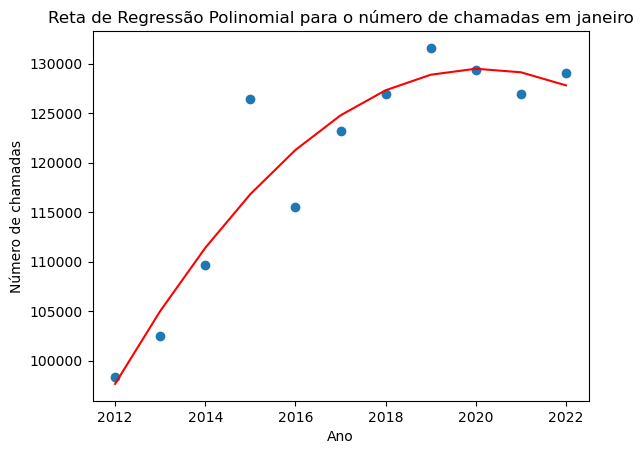

In [10]:
df_jan_comCOVID = numeroChaPorAno_Mes_comCOVID(1)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
y = np.array(df_jan_comCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em janeiro')
plt.savefig('Img/Reta de Regressão Polinomial de janeiro.png')
plt.show()

In [11]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

125507.6363620758


In [12]:
# Calculando r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.8882095785718396


### Linha de Regressão Polinomial do numero total de chamadas por ano em Janeiro (sem 2020/2021)

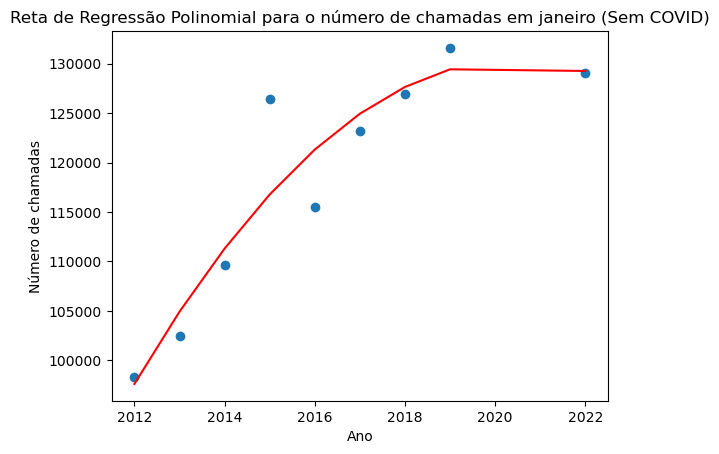

In [13]:
df_jan_semCOVID = numeroChaPorAno_Mes_semCOVID(1)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2022])
y = np.array(df_jan_semCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em janeiro (Sem COVID)')
plt.savefig('Img/Reta de Regressão Polinomial de janeiro (Sem COVID).png')
plt.show()

In [14]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

127353.68946790695


In [15]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.8788873448577064


### Linha de Regressão Polinomial do numero total de chamadas por ano em Fevereiro

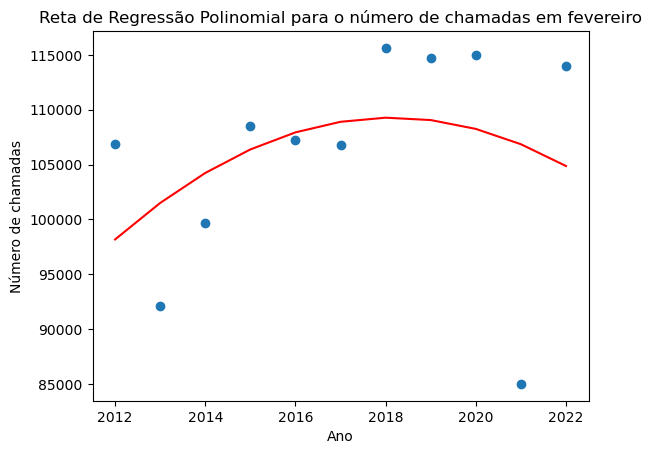

In [16]:
df_fev_comCOVID = numeroChaPorAno_Mes_comCOVID(2)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
y = np.array(df_fev_comCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em fevereiro')
plt.savefig('Img/Reta de Regressão Polinomial de fevereiro.png')
plt.show()

In [17]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

102297.23636245728


In [18]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.1247405545002952


### Linha de Regressão Polinomial do numero total de chamadas por ano em Fevereiro (sem 2020/2021)

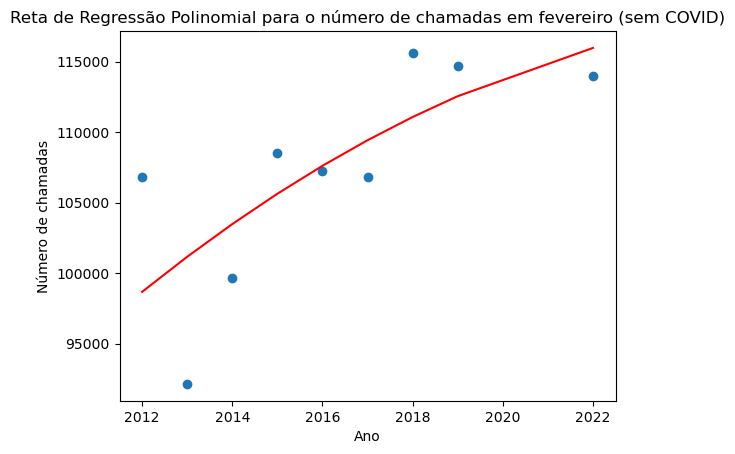

In [19]:
df_fev_semCOVID = numeroChaPorAno_Mes_semCOVID(2)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2022])
y = np.array(df_fev_semCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em fevereiro (sem COVID)')
plt.savefig('Img/Reta de Regressão Polinomial de fevereiro (Sem COVID).png')
plt.show()

In [20]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

116767.77413219213


In [21]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.547346104193042


### Linha de Regressão Polinomial do numero total de chamadas por ano em Março

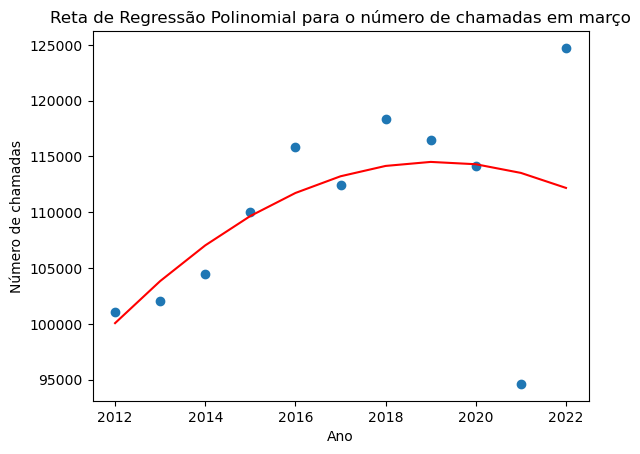

In [22]:
df_mar_comCOVID = numeroChaPorAno_Mes_comCOVID(3)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
y = np.array(df_mar_comCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em março')
plt.savefig('Img/Reta de Regressão Polinomial de março.png')
plt.show()

In [23]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

110268.17575716972


In [24]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.2901491613308814


### Linha de Regressão Polinomial do numero total de chamadas por ano em Março (sem 2020/2021)

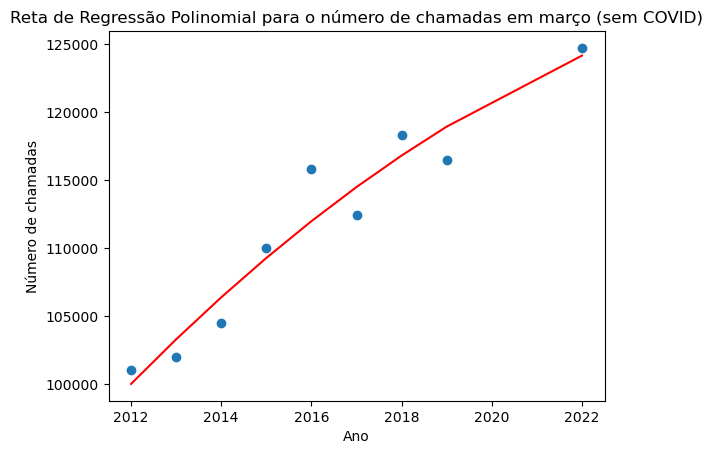

In [25]:
df_mar_semCOVID = numeroChaPorAno_Mes_semCOVID(3)

x = np.array([2012,2013,2014,2015,2016,2017,2018,2019,2022])
y = np.array(df_mar_semCOVID['Nº de Chamadas'])

coef = np.polyfit(x, y, 2)
p = np.poly1d(coef)

y_pred = p(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.xlabel('Ano')
plt.ylabel('Número de chamadas')
plt.title('Reta de Regressão Polinomial para o número de chamadas em março (sem COVID)')
plt.savefig('Img/Reta de Regressão Polinomial de março (Sem COVID).png')
plt.show()

In [26]:
#Prever o numero de chamadas de 2023

x_new = 2023
y_new = p(x_new)
print(y_new)

125520.44337809086


In [27]:
# Calcular r²
r2 = r2_score(y, p(x))

print("O coeficiente de determinação (r²) é:", r2)

O coeficiente de determinação (r²) é: 0.9339086231193368


### Número total de chamadas recebidas por mês de 2012 a 2022

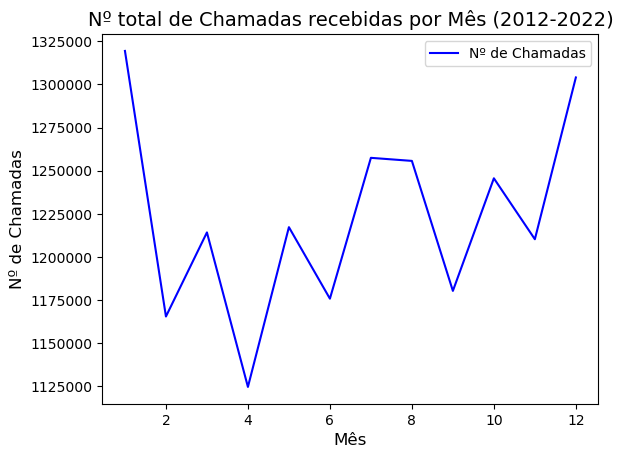

In [28]:
fig, ax = plt.subplots()

calls_by_month = df.groupby('Mês')['Nº de Chamadas'].sum()

ax = calls_by_month.plot(color='blue')

plt.title('Nº total de Chamadas recebidas por Mês (2012-2022)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Nº de Chamadas', fontsize=12)
plt.legend()

#Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.savefig('Img/Nº total de Chamadas recebidas por Mês (2012-2022)')
plt.show()

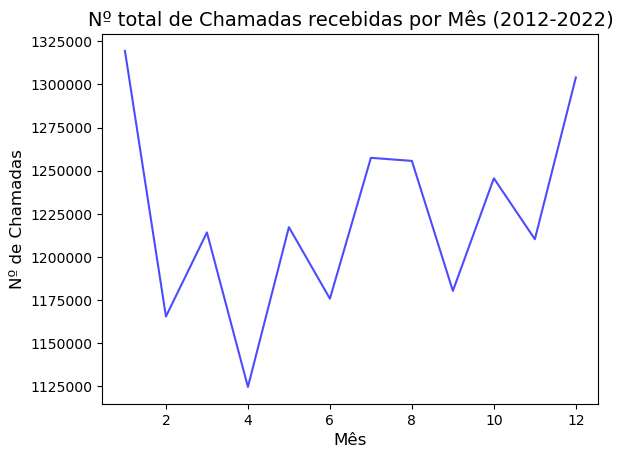

In [29]:
fig, ax = plt.subplots()
calls_by_year = df.groupby('Mês')['Nº de Chamadas'].sum()

data = pd.DataFrame({'Mês': calls_by_year.index, 'Nº de Chamadas': calls_by_year.values})

# ajustar um modelo de regressão linear
model_LR.fit(data[['Mês']], data['Nº de Chamadas'])

# plotar o gráfico de linha com os dados e a reta de regressão
ax.plot(data['Mês'], data['Nº de Chamadas'], color='blue', alpha=.7)

plt.title('Nº total de Chamadas recebidas por Mês (2012-2022)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Nº de Chamadas', fontsize=12)

# remover a notação científica do eixo y
ax.ticklabel_format(style='plain', axis='y')

#Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.savefig('Img/Nº total de Chamadas recebidas por Mês (2012-2022)')

# mostrar o gráfico
plt.show()

### Número médio de chamadas recebidas

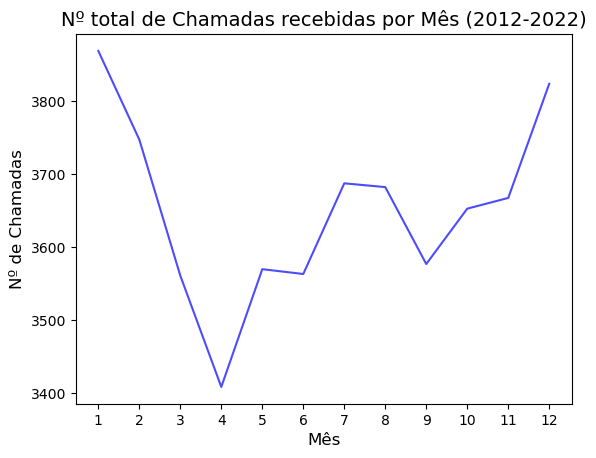

In [63]:
fig, ax = plt.subplots()
calls_by_year = df.groupby('Mês')['Nº de Chamadas'].mean()
meses = range(1, 13)

data = pd.DataFrame({'Mês': calls_by_year.index, 'Nº de Chamadas': calls_by_year.values})

model_LR.fit(data[['Mês']], data['Nº de Chamadas'])

ax.plot(data['Mês'], data['Nº de Chamadas'], color='blue', alpha=.7)

plt.xticks(range(1, 13), meses)
plt.title('Nº total de Chamadas recebidas por Mês (2012-2022)', fontsize=14)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Nº de Chamadas', fontsize=12)

# Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.savefig('Img/Nº total de Chamadas recebidas por Mês (2012-2022)')
plt.show()

### Numero de chamadas recebidas por mês, todos os anos

In [31]:
#Função para determinar o numero de chamadas recebidas por dia

def numeroChaPorDia(mes, ano):
    meses = {
        1: janeiro_comCOVID,
        2: fevereiro_comCOVID,
        3: marco_comCOVID,
        4: abril_comCOVID,
        5: maio_comCOVID,
        6: junho_comCOVID,
        7: julho_comCOVID,
        8: agosto_comCOVID,
        9: setembro_comCOVID,
        10: outubro_comCOVID,
        11: novembro_comCOVID,
        12: dezembro_comCOVID
    }

    if mes in meses:
        mes_escolhido = meses[mes][meses[mes]['Ano'] == ano]
        return mes_escolhido
    else:
        return "Erro, mês não reconhecido"


Numero de chamadas por dia Janeiro

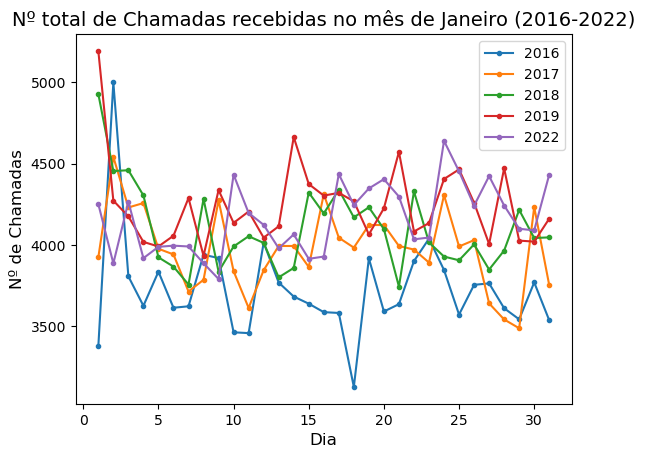

In [32]:
fig, ax = plt.subplots()

jan2016 = numeroChaPorDia(1,2016)
jan2017 = numeroChaPorDia(1,2017)
jan2018 = numeroChaPorDia(1,2018)
jan2019 = numeroChaPorDia(1,2019)
jan2022 = numeroChaPorDia(1,2022)

plt.plot(jan2016['Dia'], jan2016['Nº de Chamadas'], '.-')
plt.plot(jan2017['Dia'], jan2017['Nº de Chamadas'], '.-')
plt.plot(jan2018['Dia'], jan2018['Nº de Chamadas'], '.-')
plt.plot(jan2019['Dia'], jan2019['Nº de Chamadas'], '.-')
plt.plot(jan2022['Dia'], jan2022['Nº de Chamadas'], '.-')

plt.title('Nº total de Chamadas recebidas no mês de Janeiro (2016-2022)', fontsize=14)
plt.xlabel('Dia', fontsize=12)
plt.ylabel('Nº de Chamadas', fontsize=12)
plt.legend(['2016', '2017', '2018', '2019', '2022'])

#Retira a notação cientifica do y
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.savefig('Img/Nº total de Chamadas recebidas no mês de Janeiro (2016-2022)')
plt.show()

In [33]:
#Numero de chamadas por mes para cada ano
def numeroChaPorMes(ano):

    df_ano = df[df['Ano'] == ano]
    df_ano = df_ano.groupby('Mês')['Nº de Chamadas'].sum().reset_index()
    return df_ano


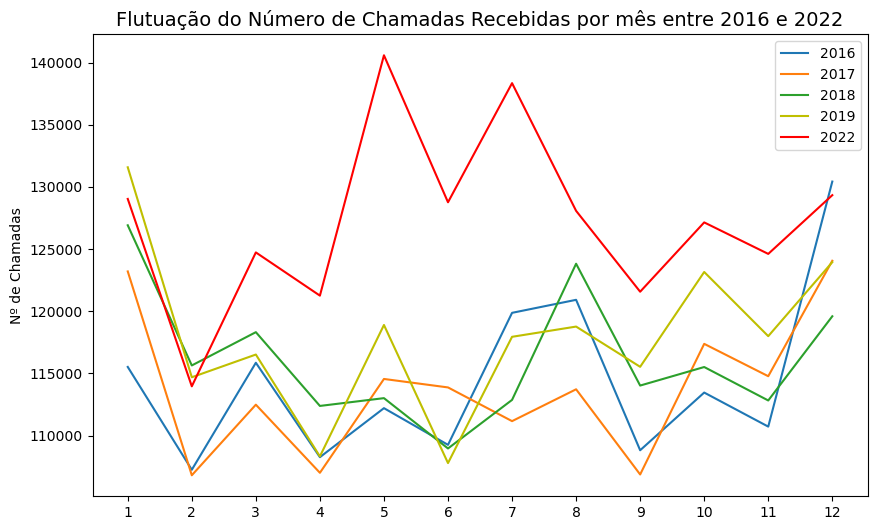

In [60]:
plt.figure(figsize=(10,6))

ano2016 = numeroChaPorMes(2016)
ano2017 = numeroChaPorMes(2017)
ano2018 = numeroChaPorMes(2018)
ano2019 = numeroChaPorMes(2019)
ano2022 = numeroChaPorMes(2022)

meses = range(1, 13)

plt.xticks(range(1, 13), meses)

plt.plot(meses, ano2016['Nº de Chamadas'], '-')
plt.plot(meses, ano2017['Nº de Chamadas'], '-')
plt.plot(meses, ano2018['Nº de Chamadas'], '-')
plt.plot(meses, ano2019['Nº de Chamadas'], 'y-')
plt.plot(meses, ano2022['Nº de Chamadas'], 'r-')

plt.title('Flutuação do Número de Chamadas Recebidas por mês entre 2016 e 2022', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['2016', '2017', '2018', '2019', '2022'])
plt.savefig('Img/Flutuação do Número de Chamadas Recebidas por mês entre 2016 e 2022')
plt.show()

Tentar fazer uma previsão

Primeiro colocar lags

In [35]:
df_mai_semCOVID = numeroChaPorAno_Mes_semCOVID(5)

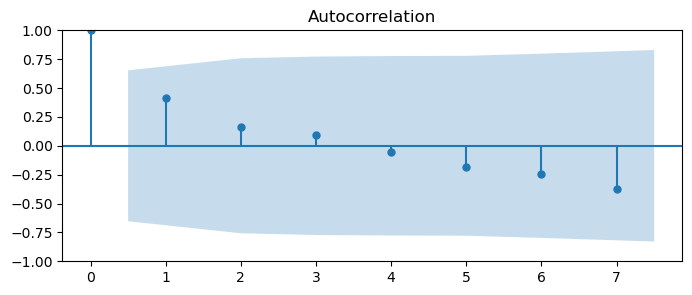

In [36]:
# Ver quantos lags fazem sentido nesta DataFrame
fig, ax = plt.subplots(1,1, figsize=(8,3))
acf = plot_acf(df_mai_semCOVID['Nº de Chamadas'], lags=7, ax=ax)
plt.show()

In [37]:
df_mai_semCOVID

,Ano,Nº de Chamadas
0,2012,96249
1,2013,97079
2,2014,103862
3,2015,106572
4,2016,112202
5,2017,114550
6,2018,113007
7,2019,118892
8,2022,140584


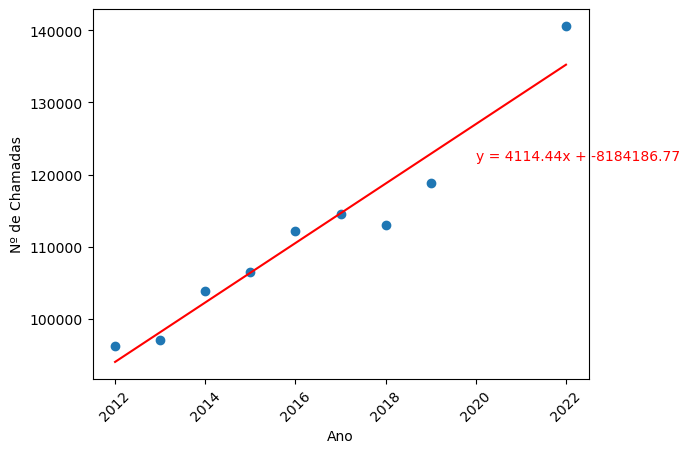

In [38]:
### REGRESSÃO LINEAR DO MES DE MAIO ENTRE 2012 E 2022, SEM 2020 E 2021 ###

anos = np.array(df_mai_semCOVID['Ano']).reshape((-1, 1))
chamadas = np.array(df_mai_semCOVID['Nº de Chamadas'])

# Treinar o modelo nos dados
model_LR.fit(anos, chamadas)
previsao = model_LR.predict(anos)

# calcular a equação da reta de regressão e adicioná-la no gráfico
slope, intercept, r_value, p_value, std_err = stats.linregress(df_mai_semCOVID['Ano'], df_mai_semCOVID['Nº de Chamadas'])
equacao_reta = f"y = {slope:.2f}x + {intercept:.2f}"
plt.annotate(equacao_reta, xy=(2020, 122000), fontsize=10, color='red')

# remover a notação científica do eixo y
plt.ticklabel_format(style='plain', axis='y')

# Desenhar gráfico
plt.scatter(anos, chamadas)
plt.plot(anos, previsao, color='red')
plt.xlabel('Ano')
plt.ylabel('Nº de Chamadas')
plt.xticks(rotation=45)
plt.show()

### Começar a ver os dias da semana

In [39]:
segundas = df[(df['Dia Semana'] == 'Segunda-feira')]
tercas = df[(df['Dia Semana'] == 'Terça-feira')]
quartas = df[(df['Dia Semana'] == 'Quarta-feira')]
quintas = df[(df['Dia Semana'] == 'Quinta-feira')]
sextas = df[(df['Dia Semana'] == 'Sexta-feira')]
sabados = df[(df['Dia Semana'] == 'Sábado')]
domingos = df[(df['Dia Semana'] == 'Domingo')]

segundas

,Dia Semana,Dia,Mês,Ano,Data,Nº de Chamadas
1,Segunda-feira,2,1,2012,2012-01-02,3263
8,Segunda-feira,9,1,2012,2012-01-09,3257
15,Segunda-feira,16,1,2012,2012-01-16,3384
22,Segunda-feira,23,1,2012,2012-01-23,3086
29,Segunda-feira,30,1,2012,2012-01-30,3224
...,...,...,...,...,...,...
3984,Segunda-feira,28,11,2022,2022-11-28,4327
3991,Segunda-feira,5,12,2022,2022-12-05,4361
3998,Segunda-feira,12,12,2022,2022-12-12,4458
4005,Segunda-feira,19,12,2022,2022-12-19,4253


Função para descobrir o numero de chamadas por dia de semana

In [40]:
#Função para determinar o numero de chamadas recebidas por
#dia da semana (pds) num MÊS!!! 

def numeroChaPDS(mes, ano):

    segEsc = segundas[((segundas['Ano'] == ano) & (segundas['Mês'] == mes))]
    terEsc = tercas[(tercas['Ano'] == ano) & (tercas['Mês'] == mes)]
    quaEsc = quartas[(quartas['Ano'] == ano) & (quartas['Mês'] == mes)]
    quiEsc = quintas[(quintas['Ano'] == ano) & (quintas['Mês'] == mes)]
    sexEsc = sextas[(sextas['Ano'] == ano) & (sextas['Mês'] == mes)]
    sabEsc = sabados[(sabados['Ano'] == ano) & (sabados['Mês'] == mes)]
    domEsc = domingos[(domingos['Ano'] == ano) & (domingos['Mês'] == mes)]

    nChamadas_Seg = segEsc['Nº de Chamadas'].sum()
    nChamadas_Ter = terEsc['Nº de Chamadas'].sum()
    nChamadas_Qua = quaEsc['Nº de Chamadas'].sum()
    nChamadas_Qui = quiEsc['Nº de Chamadas'].sum()
    nChamadas_Sex = sexEsc['Nº de Chamadas'].sum()
    nChamadas_Sab = sabEsc['Nº de Chamadas'].sum()
    nChamadas_Dom = domEsc['Nº de Chamadas'].sum()

    lista_Chamadas = [nChamadas_Seg, nChamadas_Ter, nChamadas_Qua, nChamadas_Qui,
          nChamadas_Sex, nChamadas_Sab, nChamadas_Dom]

    lista_DiaSemana = ['Segunda', 'Terça', 'Quarta',
    'Quinta', 'Sexta', 'Sábado', 'Domingo']

    new_df = pd.DataFrame({'Dia Semana': lista_DiaSemana, 
                        'Nº de Chamadas': lista_Chamadas})

    return new_df

numeroChaPDS(4,2022)

,Dia Semana,Nº de Chamadas
0,Segunda,16070
1,Terça,15859
2,Quarta,15984
3,Quinta,16251
4,Sexta,20776
5,Sábado,20510
6,Domingo,15802


### Numero total de chamadas no mes de Janeiro de 6 anos

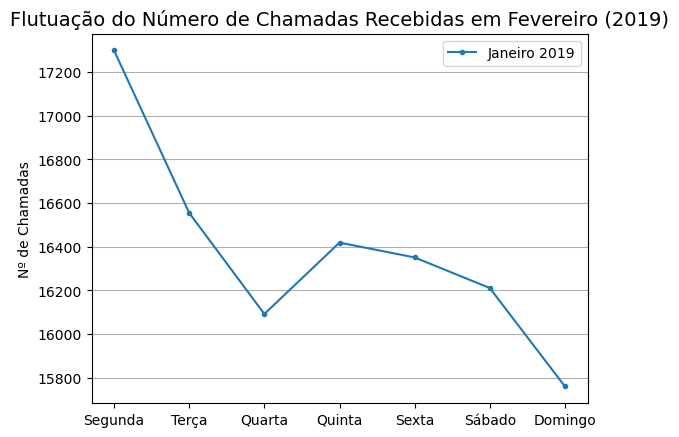

In [41]:
fev2019 = numeroChaPDS(2, 2019)

plt.plot(fev2019['Dia Semana'], fev2019['Nº de Chamadas'], '.-')
         
plt.title('Flutuação do Número de Chamadas Recebidas em Fevereiro (2019)', fontsize=14)
plt.ylabel('Nº de Chamadas')
plt.legend(['Janeiro 2019'])
plt.grid(axis='y')

plt.savefig('Img/Flutuação do Número de Chamadas Recebidas em Fevereiro (2019)')

plt.show()

# PREVER

In [42]:
# Índice por dia
n_chamadas_com_indices = df_sem_2020e2021.copy()
n_chamadas_com_indices = n_chamadas_com_indices.drop(['Dia Semana', 'Dia', 'Mês', 'Ano'], axis = 1)
n_chamadas_com_indices['indice_dia'] = range(1,3288)


# Índice por mês
n_chamadas_com_indices['numero_mes'] = n_chamadas_com_indices['Data'].dt.strftime('%Y-%m')
n_chamadas_com_indices['indice_mes'] = n_chamadas_com_indices.groupby('numero_mes').ngroup() + 1
n_chamadas_com_indices.drop(['numero_mes'], axis=1, inplace=True)

# Índice por Semana
n_chamadas_com_indices['numero_semana'] = n_chamadas_com_indices['Data'].dt.strftime('%Y-%U')
n_chamadas_com_indices['indice_semana'] = n_chamadas_com_indices.groupby('numero_semana').ngroup() + 1
n_chamadas_com_indices.drop(['numero_semana'], axis=1, inplace=True)

n_chamadas_com_indices

,Data,Nº de Chamadas,indice_dia,indice_mes,indice_semana
0,2012-01-01,4538,1,1,1
1,2012-01-02,3263,2,1,1
2,2012-01-03,3126,3,1,1
3,2012-01-04,3199,4,1,1
4,2012-01-05,2999,5,1,1
...,...,...,...,...,...
4013,2022-12-27,4182,3283,108,477
4014,2022-12-28,4157,3284,108,477
4015,2022-12-29,4018,3285,108,477
4016,2022-12-30,4012,3286,108,477


### Número de chamadas por ano

In [43]:
### PREVER O NUMERO DE CHAMADAS PARA 2023 COM REGRESSÃO LINEAR

x = np.array(calls_by_year_df.index).reshape(-1, 1)
y = calls_by_year_df['Nº de Chamadas']
model_LR.fit(x, y)

indice_do_mes_a_prever = [[9]]

previsao_2023 = model_LR.predict(indice_do_mes_a_prever)

print("Previsão para o próximo ano (2023):", int(previsao_2023))

Previsão para o próximo ano (2023): 1539055


In [44]:
## Fazer data sets

n_chamadas_por_dia = n_chamadas_com_indices[['indice_dia', 'Nº de Chamadas']]

n_chamadas_por_semana = n_chamadas_com_indices.groupby(['indice_semana'])['Nº de Chamadas'].sum()
n_chamadas_por_semana = pd.DataFrame({'indice_semana': n_chamadas_por_semana.index, 'Nº de Chamadas': n_chamadas_por_semana.values})

n_chamadas_por_mes = n_chamadas_com_indices.groupby(['indice_mes'])['Nº de Chamadas'].sum()
n_chamadas_por_mes = pd.DataFrame({'indice_mes': n_chamadas_por_mes.index, 'Nº de Chamadas': n_chamadas_por_mes.values})

### Número de chamadas por mês

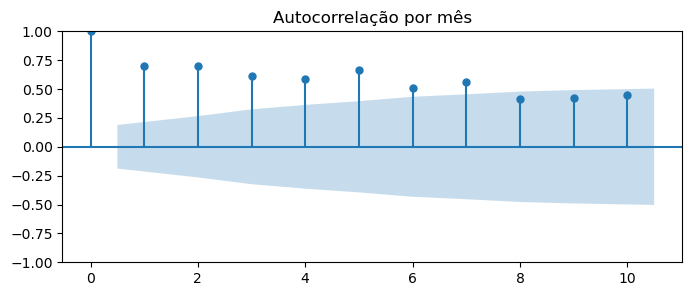

In [45]:
# Ver quantos lags fazem sentido nesta DataFrame
fig, ax = plt.subplots(1,1, figsize=(8,3))
acf = plot_acf(n_chamadas_por_mes['Nº de Chamadas'], lags=10, ax=ax, title='Autocorrelação por mês')
plt.show()

In [46]:
### PREVER O NUMERO DE CHAMADAS PARA O PRIMEIRO MÊS DE 2023 COM REGRESSÃO LINEAR

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_1mes_23 = model_LR.predict([[109]])
emap_mes1 = ((mean_absolute_error([[129474]], previsao_1mes_23)) / [[129474]])
r2_mes1 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O SEGUNDO MÊS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1],'Nº de Chamadas': [129474]})
n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_2mes_23 = model_LR.predict([[110]])
emap_mes2 = ((mean_absolute_error([[118027]], previsao_2mes_23)) / [[118027]])
r2_mes2 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O TERCEIRO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1],'Nº de Chamadas': [118027]})
n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_3mes_23 = model_LR.predict([[111]])
emap_mes3 = ((mean_absolute_error([[127016]], previsao_3mes_23)) / [[127016]])
r2_mes3 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O QUARTO MêS DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_mes['indice_mes'].max()
nova_linha = pd.DataFrame({'indice_mes': [ultimo_indice + 1], 'Nº de Chamadas': [127016]})
n_chamadas_por_mes = pd.concat([n_chamadas_por_mes, nova_linha], ignore_index=True)

x = n_chamadas_por_mes['indice_mes'].values.reshape(-1, 1)
y = n_chamadas_por_mes['Nº de Chamadas']
model_LR.fit(x, y)
previsao_4mes_23 = model_LR.predict([[112]])
emap_mes4 = ((mean_absolute_error([[118350]], previsao_4mes_23)) / [[118350]])
r2_mes4 = r2_score(y, model_LR.predict(x))

In [47]:
# TABELA 

data_D = ['Janeiro', 'Fevereiro', 'Março', 'Abril']
valor_previsto_D = [int(previsao_1mes_23), int(previsao_2mes_23), int(previsao_3mes_23), int(previsao_4mes_23)]
valor_real_D = [129474, 118027, 127016, 118350]
emap_D = [float(emap_mes1), float(emap_mes2), float(emap_mes3), float(emap_mes4)]
r2_D = [float(r2_mes1), float(r2_mes2), float(r2_mes3), float(r2_mes4)]

tabela_Dia = pd.DataFrame({
    'Mês': data_D,
    'Valor Real': valor_real_D,
    'Valor Previsto': valor_previsto_D,
    'Erro Médio Absoluto': emap_D,
    'R2': r2_D
})

tabela_Dia['Erro Médio Absoluto'] = tabela_Dia['Erro Médio Absoluto'].map('{:.3%}'.format)
tabela_Dia['R2'] = tabela_Dia['R2'].map('{:.3}'.format)
tabela_Dia['Valor Previsto'] = tabela_Dia['Valor Previsto'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia['Valor Real'] = tabela_Dia['Valor Real'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia

,Mês,Valor Real,Valor Previsto,Erro Médio Absoluto,R2
0,Janeiro,129 474,126 600,2.220%,0.677
1,Fevereiro,118 027,126 991,7.595%,0.685
2,Março,127 016,126 953,0.050%,0.68
3,Abril,118 350,127 238,7.510%,0.686


##### A ver por cada mês (Não é assim)!

In [48]:
"""
janeiro_dados = n_chamadas_por_mes.loc[n_chamadas_por_mes['Mês'].str.startswith('01-'), :].copy()
janeiro_dados['Índice'] = range(1,10)

fevereiro_dados = n_chamadas_por_mes.loc[n_chamadas_por_mes['Mês'].str.startswith('02-'), :].copy()
fevereiro_dados['Índice'] = range(1,10)

março_dados = n_chamadas_por_mes.loc[n_chamadas_por_mes['Mês'].str.startswith('03-'), :].copy()
março_dados['Índice'] = range(1,10)

abril_dados = n_chamadas_por_mes.loc[n_chamadas_por_mes['Mês'].str.startswith('04-'), :].copy()
abril_dados['Índice'] = range(1,10)

maio_dados = n_chamadas_por_mes.loc[n_chamadas_por_mes['Mês'].str.startswith('05-'), :].copy()
maio_dados['Índice'] = range(1,10)

indice_do_mes_a_prever = [[10]]

### PREVER O NUMERO DE CHAMADAS PARA JANEIRO DE 2023 COM REGRESSÃO LINEAR

x = janeiro_dados['Índice'].values.reshape(-1, 1)
y = janeiro_dados['Nº de Chamadas']
model_LR.fit(x, y)
previsao_jan23 = model_LR.predict(indice_do_mes_a_prever)


### PREVER O NUMERO DE CHAMADAS PARA FEVEREIRO DE 2023 COM REGRESSÃO LINEAR

x = fevereiro_dados['Índice'].values.reshape(-1, 1)
y = fevereiro_dados['Nº de Chamadas']
model_LR.fit(x, y)
previsao_fev23 = model_LR.predict(indice_do_mes_a_prever)


### PREVER O NUMERO DE CHAMADAS PARA MARÇO DE 2023 COM REGRESSÃO LINEAR

x = março_dados['Índice'].values.reshape(-1, 1)
y = março_dados['Nº de Chamadas']
model_LR.fit(x, y)
previsao_mar23 = model_LR.predict(indice_do_mes_a_prever)


### PREVER O NUMERO DE CHAMADAS PARA ABRIL DE 2023 COM REGRESSÃO LINEAR

x = abril_dados['Índice'].values.reshape(-1, 1)
y = abril_dados['Nº de Chamadas']
model_LR.fit(x, y)
previsao_abr23 = model_LR.predict(indice_do_mes_a_prever)


### PREVER O NUMERO DE CHAMADAS PARA MAIO DE 2023 COM REGRESSÃO LINEAR

x = maio_dados['Índice'].values.reshape(-1, 1)
y = maio_dados['Nº de Chamadas']
model_LR.fit(x, y)
previsao_mai23 = model_LR.predict(indice_do_mes_a_prever)

#model_LR.score(127719,133864)


### ERRO MÉDIO ABSOLUTO PERCENTUAL

emap_jan = ((mean_absolute_error([[129474]], previsao_jan23)) / [[129474]])
emap_fev = ((mean_absolute_error([[118027]], previsao_fev23)) / [[118027]])
emap_mar = ((mean_absolute_error([[127016]], previsao_mar23)) / [[127016]])
emap_abr = ((mean_absolute_error([[118350]], previsao_abr23)) / [[118350]])
emap_mai = ((mean_absolute_error([[127719]], previsao_mai23)) / [[127719]])

# TABELA 

meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio']

valor_previsto = [int(previsao_jan23), int(previsao_fev23), int(previsao_mar23), int(previsao_abr23), int(previsao_mai23)]

valor_real = [129474, 118027, 127016, 118350, 127719]

emap = [float(emap_jan), float(emap_fev), float(emap_mar), float(emap_abr), float(emap_mai)]

tabela = pd.DataFrame({
    'Meses': meses,
    'Valor Previsto': valor_previsto,
    'Valor Real': valor_real,
    'Erro Médio Absoluto': emap
})

tabela['Erro Médio Absoluto'] = tabela['Erro Médio Absoluto'].map('{:.3%}'.format)
tabela['Valor Previsto'] = tabela['Valor Previsto'].map('{:,}'.format).str.replace(',', ' ')
tabela['Valor Real'] = tabela['Valor Real'].map('{:,}'.format).str.replace(',', ' ')

tabela
"""

"\njaneiro_dados = n_chamadas_por_mes.loc[n_chamadas_por_mes['Mês'].str.startswith('01-'), :].copy()\njaneiro_dados['Índice'] = range(1,10)\n\nfevereiro_dados = n_chamadas_por_mes.loc[n_chamadas_por_mes['Mês'].str.startswith('02-'), :].copy()\nfevereiro_dados['Índice'] = range(1,10)\n\nmarço_dados = n_chamadas_por_mes.loc[n_chamadas_por_mes['Mês'].str.startswith('03-'), :].copy()\nmarço_dados['Índice'] = range(1,10)\n\nabril_dados = n_chamadas_por_mes.loc[n_chamadas_por_mes['Mês'].str.startswith('04-'), :].copy()\nabril_dados['Índice'] = range(1,10)\n\nmaio_dados = n_chamadas_por_mes.loc[n_chamadas_por_mes['Mês'].str.startswith('05-'), :].copy()\nmaio_dados['Índice'] = range(1,10)\n\nindice_do_mes_a_prever = [[10]]\n\n### PREVER O NUMERO DE CHAMADAS PARA JANEIRO DE 2023 COM REGRESSÃO LINEAR\n\nx = janeiro_dados['Índice'].values.reshape(-1, 1)\ny = janeiro_dados['Nº de Chamadas']\nmodel_LR.fit(x, y)\nprevisao_jan23 = model_LR.predict(indice_do_mes_a_prever)\n\n\n### PREVER O NUMERO DE C

### Número de chamadas por dia

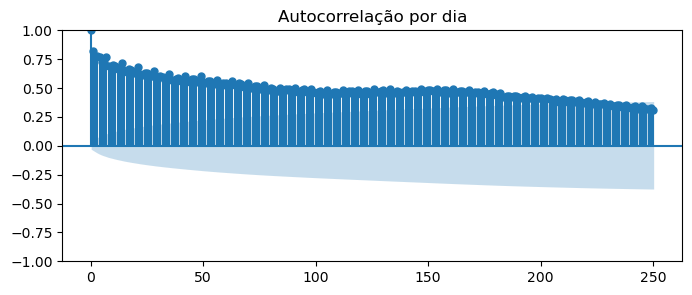

In [49]:
# Ver quantos lags fazem sentido nesta DataFrame
fig, ax = plt.subplots(1,1, figsize=(8,3))
acf = plot_acf(n_chamadas_por_dia['Nº de Chamadas'], lags=250, ax=ax, title='Autocorrelação por dia')
plt.show()

In [50]:
### PREVER O NUMERO DE CHAMADAS PARA O PRIMEIRO DIA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

x = n_chamadas_por_dia['indice_dia'].values.reshape(-1, 1)
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(x, y)
previsao_1dia_jan23 = model_LR.predict([[3288]])
emap_jan1 = ((mean_absolute_error([[4552]], previsao_1dia_jan23)) / [[4552]])
r2_jan1 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O SEGUNDO DIA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1], 'Nº de Chamadas': [4552]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

x = n_chamadas_por_dia['indice_dia'].values.reshape(-1, 1)
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(x, y)
previsao_2dia_jan23 = model_LR.predict([[3289]])
emap_jan2 = ((mean_absolute_error([[3910]], previsao_2dia_jan23)) / [[3910]])
r2_jan2 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O TERCEIRO DIA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1], 'Nº de Chamadas': [3910]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

x = n_chamadas_por_dia['indice_dia'].values.reshape(-1, 1)
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(x, y)
previsao_3dia_jan23 = model_LR.predict([[3290]])
emap_jan3 = ((mean_absolute_error([[4601]], previsao_3dia_jan23)) / [[4601]])
r2_jan3 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA O QUARTO DIA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_dia['indice_dia'].max()
nova_linha = pd.DataFrame({'indice_dia': [ultimo_indice + 1], 'Nº de Chamadas': [4601]})
n_chamadas_por_dia = pd.concat([n_chamadas_por_dia, nova_linha], ignore_index=True)

x = n_chamadas_por_dia['indice_dia'].values.reshape(-1, 1)
y = n_chamadas_por_dia['Nº de Chamadas']
model_LR.fit(x, y)
previsao_4dia_jan23 = model_LR.predict([[3291]])
emap_jan4 = ((mean_absolute_error([[4292]], previsao_4dia_jan23)) / [[4292]])
r2_jan4 = r2_score(y, model_LR.predict(x))

In [51]:
# TABELA 

data_D = ['01-01-2023', '02-01-2023', '03-01-2023', '04-01-2023']
valor_previsto_D = [int(previsao_1dia_jan23), int(previsao_2dia_jan23), int(previsao_3dia_jan23), int(previsao_4dia_jan23)]
valor_real_D = [4552, 3910, 4601, 4292]
emap_D = [float(emap_jan1), float(emap_jan2), float(emap_jan3), float(emap_jan4)]
r2_D = [float(r2_jan1), float(r2_jan2), float(r2_jan3), float(r2_jan4)]

tabela_Dia = pd.DataFrame({
    'Dia': data_D,
    'Valor Real': valor_real_D,
    'Valor Previsto': valor_previsto_D,
    'Erro Médio Absoluto': emap_D,
    'R2': r2_D
})

tabela_Dia['Erro Médio Absoluto'] = tabela_Dia['Erro Médio Absoluto'].map('{:.3%}'.format)
tabela_Dia['R2'] = tabela_Dia['R2'].map('{:.3}'.format)
tabela_Dia['Valor Previsto'] = tabela_Dia['Valor Previsto'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia['Valor Real'] = tabela_Dia['Valor Real'].map('{:,}'.format).str.replace(',', ' ')
tabela_Dia

,Dia,Valor Real,Valor Previsto,Erro Médio Absoluto,R2
0,01-01-2023,4 552,4 153,8.761%,0.527
1,02-01-2023,3 910,4 153,6.240%,0.528
2,03-01-2023,4 601,4 153,9.716%,0.527
3,04-01-2023,4 292,4 154,3.196%,0.528


### Número de chamadas por semana

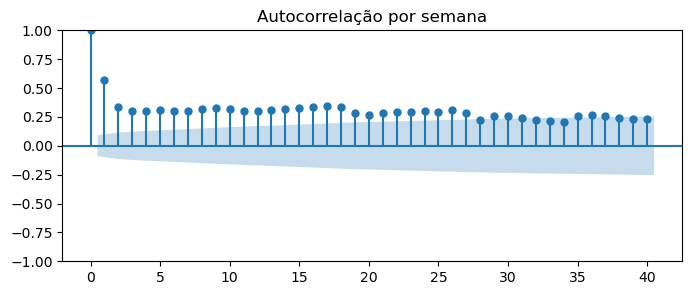

In [52]:
# Ver quantos lags fazem sentido nesta DataFrame
fig, ax = plt.subplots(1,1, figsize=(8,3))
acf = plot_acf(n_chamadas_por_semana['Nº de Chamadas'], lags=40, ax=ax, title='Autocorrelação por semana')
plt.show()

In [53]:
### PREVER O NUMERO DE CHAMADAS PARA A PRIMEIRA SEMANA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

x = n_chamadas_por_semana['indice_semana'].values.reshape(-1, 1)
y = n_chamadas_por_semana['Nº de Chamadas']
model_LR.fit(x, y)
previsao_1semana_jan23 = model_LR.predict([[478]])
emap_jan1 = ((mean_absolute_error([[29848]], previsao_1semana_jan23)) / [[29848]])
r2_jan1 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA A SEGUNDA SEMANA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_semana['indice_semana'].max()
nova_linha = pd.DataFrame({'indice_semana': [ultimo_indice + 1], 'Nº de Chamadas': [29848]})
n_chamadas_por_semana = pd.concat([n_chamadas_por_semana, nova_linha], ignore_index=True)

x = n_chamadas_por_semana['indice_semana'].values.reshape(-1, 1)
y = n_chamadas_por_semana['Nº de Chamadas']
model_LR.fit(x, y)
previsao_2semana_jan23 = model_LR.predict([[479]])
emap_jan2 = ((mean_absolute_error([[29216]], previsao_2semana_jan23)) / [[29216]])
r2_jan2 = r2_score(y, model_LR.predict(x))

n_chamadas_por_semana

### PREVER O NUMERO DE CHAMADAS PARA A TERCEIRA SEMANA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_semana['indice_semana'].max()
nova_linha = pd.DataFrame({'indice_semana': [ultimo_indice + 1], 'Nº de Chamadas': [29216]})
n_chamadas_por_semana = pd.concat([n_chamadas_por_semana, nova_linha], ignore_index=True)

x = n_chamadas_por_semana['indice_semana'].values.reshape(-1, 1)
y = n_chamadas_por_semana['Nº de Chamadas']
model_LR.fit(x, y)
previsao_3semana_jan23 = model_LR.predict([[480]])
emap_jan3 = ((mean_absolute_error([[28473]], previsao_3semana_jan23)) / [[28473]])
r2_jan3 = r2_score(y, model_LR.predict(x))

### PREVER O NUMERO DE CHAMADAS PARA A QUARTA SEMANA DE JANEIRO DE 2023 COM REGRESSÃO LINEAR

ultimo_indice = n_chamadas_por_semana['indice_semana'].max()
nova_linha = pd.DataFrame({'indice_semana': [ultimo_indice + 1], 'Nº de Chamadas': [28473]})
n_chamadas_por_semana = pd.concat([n_chamadas_por_semana, nova_linha], ignore_index=True)

x = n_chamadas_por_semana['indice_semana'].values.reshape(-1, 1)
y = n_chamadas_por_semana['Nº de Chamadas']
model_LR.fit(x, y)
previsao_4semana_jan23 = model_LR.predict([[481]])
emap_jan4 = ((mean_absolute_error([[29116]], previsao_4semana_jan23)) / [[29116]])
r2_jan4 = r2_score(y, model_LR.predict(x))

In [54]:
# TABELA 

data_S = ['Semana 1 de 2023', 'Semana 2 de 2023', 'Semana 3 de 2023', 'Semana 4 de 2023']
valor_previsto_S = [int(previsao_1semana_jan23), int(previsao_2semana_jan23), int(previsao_3semana_jan23), int(previsao_4semana_jan23)]
valor_real_S = [29848, 29216, 28473, 29116]
emap_S = [float(emap_jan1), float(emap_jan2), float(emap_jan3), float(emap_jan4)]
r2_S = [float(r2_jan1), float(r2_jan2), float(r2_jan3), float(r2_jan4)]

tabela_Semana = pd.DataFrame({
    'Semana': data_S,
    'Valor Real': valor_real_S,
    'Valor Previsto': valor_previsto_S,
    'Erro Médio Absoluto': emap_S,
    'R2': r2_S
})

tabela_Semana['Erro Médio Absoluto'] = tabela_Semana['Erro Médio Absoluto'].map('{:.3%}'.format)
tabela_Semana['R2'] = tabela_Semana['R2'].map('{:.3}'.format)
tabela_Semana['Valor Previsto'] = tabela_Semana['Valor Previsto'].map('{:,}'.format).str.replace(',', ' ')
tabela_Semana['Valor Real'] = tabela_Semana['Valor Real'].map('{:,}'.format).str.replace(',', ' ')
tabela_Semana

,Semana,Valor Real,Valor Previsto,Erro Médio Absoluto,R2
0,Semana 1 de 2023,29 848,28 594,4.201%,0.325
1,Semana 2 de 2023,29 216,28 619,2.043%,0.328
2,Semana 3 de 2023,28 473,28 638,0.581%,0.329
3,Semana 4 de 2023,29 116,28 651,1.595%,0.331
